In [1]:
# %%
# Importing various packages
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import re 
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns 
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
print("Import Done")

Import Done


In [2]:
# %%
# Getting the Korean film reviews
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")
train = pd.read_table('ratings_train.txt') #splitting vetween training and test datasets
test = pd.read_table('ratings_test.txt')
train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [3]:
# %%
# Dropping numerical ID column as it is not helpful
train = train.drop(['id'],axis=1) 
test = test.drop(['id'],axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  149995 non-null  object
 1   label     150000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [4]:
# %%
# Checking the training data for any null values and locating them
print(train.isnull().values.any())
train.loc[train.document.isnull()]

True


,document,label
25857,NaN,1
55737,NaN,1
110014,NaN,0
126782,NaN,0
140721,NaN,0


In [5]:
# %%
# Dropping null reviews in training
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  149995 non-null  object
 1   label     149995 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [6]:
# %%
# Creating another column where punctuations are removed for the review
train['word_n_2']=train['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]"," ")
test['document']=test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]"," ")
test['document'].replace('', np.nan, inplace=True)
test = test.dropna()
train.head(20)

C:\Users\Kelvin\AppData\Local\Temp/ipykernel_10108/943551692.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train['word_n_2']=train['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]"," ")
C:\Users\Kelvin\AppData\Local\Temp/ipykernel_10108/943551692.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  test['document']=test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]"," ")


,document,label,word_n_2
0,아 더빙.. 진짜 짜증나네요 목소리,0,아 더빙 진짜 짜증나네요 목소리
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나
2,너무재밓었다그래서보는것을추천한다,0,너무재밓었다그래서보는것을추천한다
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소 이야기구먼 솔직히 재미는 없다 평점 조정
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...
5,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0,막 걸음마 뗀 세부터 초등학교 학년생인 살용영화 ㅋㅋㅋ 별반개도 아까움
6,원작의 긴장감을 제대로 살려내지못했다.,0,원작의 긴장감을 제대로 살려내지못했다
7,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지 정말 발로해도 그것보단...
8,액션이 없는데도 재미 있는 몇안되는 영화,1,액션이 없는데도 재미 있는 몇안되는 영화
9,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1,왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나


100%|██████████| 49997/49997 [02:09<00:00, 385.47it/s]


Max Length for Reviews : 95
Average Length of Reviews : 12.332184406146872


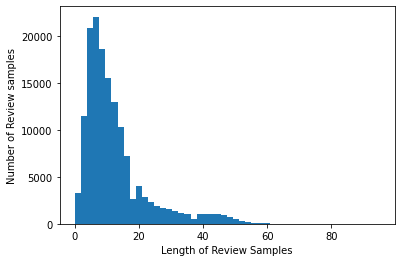

In [7]:
# %%
# Tokenization and Removing Stopwords
import os
'JAVA_HOME' in os.environ
from tqdm import tqdm
os.environ['JAVA_HOME'] = r'C:\Program Files\Java\jdk-17.0.1'
okt = Okt()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
X_train = []
X_test = []
for sentence in tqdm(train['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # Train set tokenization
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # train set stopwords
    X_train.append(stopwords_removed_sentence)
for sentence in tqdm(test['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # Test set tokenization
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # test set stowords
    X_test.append(stopwords_removed_sentence)
print('Max Length for Reviews :',max(len(review) for review in X_train))
print('Average Length of Reviews :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('Length of Review Samples')
plt.ylabel('Number of Review samples')
plt.show()

In [8]:
# %%
# Limiting tokens to words that have only shown up more than 4h times 
max_features = 9308 # Number of words that have popped up more than 4 times in the training set
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# %%
# Padding and cutting reviews when they are > 50 words
drop_train = [index for index, sentence in enumerate(X_test) if len(sentence) <1]
X_test = np.delete(X_test, drop_train, axis=0)
max_len = 50
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=50)

In [10]:
# Creating the model
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Bidirectional, GlobalMaxPool1D
y_train = np.array(train['label'])
y_test = np.array(test['label'])
y_test = np.delete(y_test, drop_train, axis=0)
embed_size = 128
model = Sequential()
model.add(Embedding(max_features, embed_size))
model.add(Bidirectional(LSTM(64, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 100
epochs = 3
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
1875/1875 [==============================] - 46s 21ms/step - loss: 0.3922 - acc: 0.8276 - val_loss: 0.3408 - val_acc: 0.8535

Epoch 00001: val_acc improved from -inf to 0.85350, saving model to best_model.h5
Epoch 2/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3276 - acc: 0.8629 - val_loss: 0.3193 - val_acc: 0.8630

Epoch 00002: val_acc improved from 0.85350 to 0.86296, saving model to best_model.h5
Epoch 3/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3047 - acc: 0.8741 - val_loss: 0.3224 - val_acc: 0.8682

Epoch 00003: val_acc improved from 0.86296 to 0.86823, saving model to best_model.h5
Epoch 4/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2872 - acc: 0.8828 - val_loss: 0.3125 - val_acc: 0.8694

Epoch 00004: val_acc improved from 0.86823 to 0.86940, saving model to best_model.h5
Epoch 5/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2724 - acc: 0.8900 - val_loss: 0.30

In [11]:
# Taking the best model used for our data
from tensorflow.keras.models import load_model
loaded_model = load_model('best_model.h5')
print("\n Test Accuracy: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))
model.summary()

1544/1544 [==============================] - 14s 9ms/step - loss: 0.3352 - acc: 0.8560

 Test Accuracy: 0.8560
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1191424   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         98816     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total param

Accuracy_score:  0.8560236451606373
Precision_score:  0.8543157558069804
Recall_score:  0.8603696098562629
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.85      0.85     24560
           1       0.85      0.86      0.86     24837

    accuracy                           0.86     49397
   macro avg       0.86      0.86      0.86     49397
weighted avg       0.86      0.86      0.86     49397



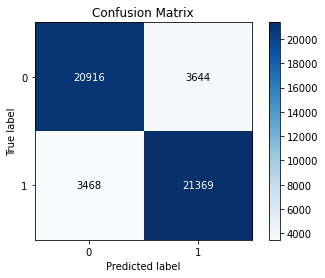

In [12]:
# Evaluating model performance
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import re
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
import scikitplot as skplt

# Making predictions using 0.5 as the cutooff
predictions = loaded_model.predict(X_test)
predictions = (predictions >= 0.5)
from scikitplot.metrics import plot_confusion_matrix
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)

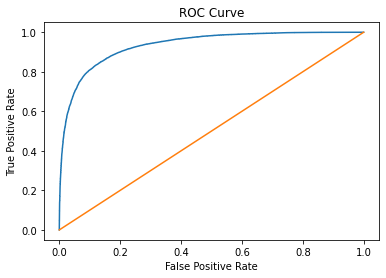

In [13]:
# Plotting ROC curve
predictions_probability = loaded_model.predict(X_test)
fpr,tpr,thresholds = roc_curve(y_test,predictions_probability[:,0])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()